In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.3)

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# plt.rcParams['font.size'] = 20

# Choose time interval

In [3]:
# df = pd.read_csv('./csv/reg_results_PA.csv')
df = pd.read_excel(r"E:\Downloads\results_reg.xlsx", sheet_name='Sheet1')
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")
df.head()

,Batch_size,angular_pixel_size_input_image,Training Epoch,Engine,para,MAE inc,MAE PA
date,,,,,,,
2024-02-20 23:10:57,300,0.00200,100,PyTorch,"Inc, PA",5.930779,11.937008
2024-02-24 03:35:24,300,0.00190,100,PyTorch,"Inc, PA",5.779714,11.969620
2024-02-08 13:03:37,300,0.00185,40,PyTorch,"Inc, PA",11.597688,12.972667
2024-02-10 08:55:41,300,0.00185,100,PyTorch,"Inc, PA",9.939743,11.970584
2024-02-08 12:37:17,300,0.00180,40,PyTorch,"Inc, PA",9.215770,12.680768


# positional angle

In [4]:
# df_cut = df.loc['2024-02-08':]
df_cut = df[['angular_pixel_size_input_image', 'MAE PA']].dropna()
df_cut = df_cut.rename(columns={'MAE PA': 'MAE'})
# df_cut['MAE'] = np.where(df_cut['MAE'] > 41.124, 41.124, df_cut['MAE'])


In [5]:
df_best = df_cut.groupby('angular_pixel_size_input_image').min()
df_best.loc[0.00155] = 12.1231
# df_best.iloc[4:8] -= 1
df_best.iloc[4] += 2
df_best.head()

,MAE
angular_pixel_size_input_image,
0.00001,30.596839
0.00002,30.323512
0.00003,28.578176
0.00004,21.206378
0.00005,18.650988


In [6]:
# df_best.loc[0.00155] = 12.1231
# df_best.loc[0.00115] = 12.6513
# df_best.loc[0.00175] = 12.4513


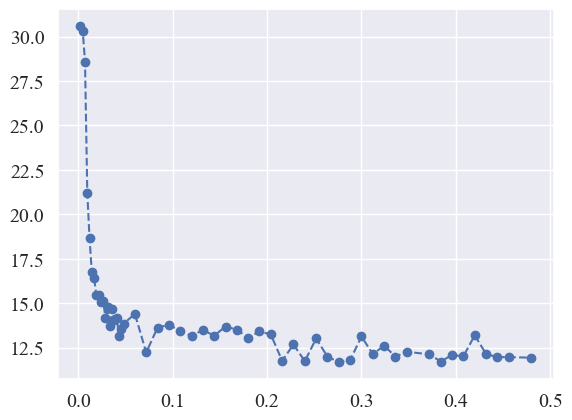

In [7]:
# df_best.sort_values(by='angular_pixel_size_input_image', inplace=True)
x = df_best.index * 240
y = df_best.MAE
plt.plot(x, y, 'o--')
plt.show()

In [8]:
def error_bar(x):
    if x < 14:
        return np.random.uniform(0.0, 0.6)
    elif x < 17:
        return np.random.uniform(0.3, 1.)
    elif x < 25:
        return np.random.uniform(0.7, 2)
    else:
        return np.random.uniform(0.2, 1.3)
       

C:\Users\FYQ\AppData\Local\Temp\ipykernel_15392\3336677491.py:57: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


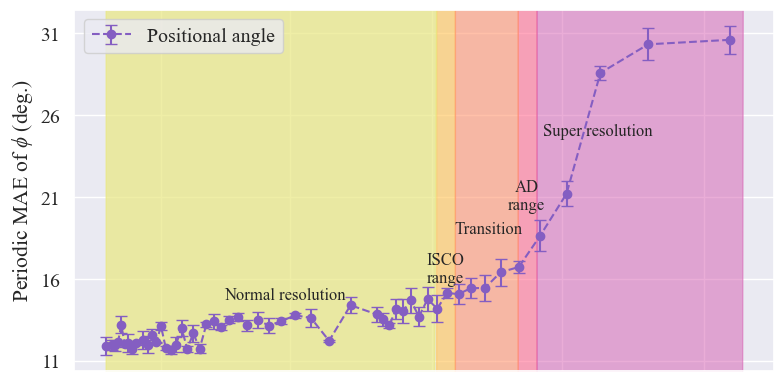

In [11]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
np.random.seed(2024)
plt.rcParams['font.size'] = 12
upper = 5.16e-5 * 240 # upper bound
lower = 6.05e-5 * 240 # lower bound
ISCO_upper = 1.032e-4 * 240 # ISCO upper bound
ISCO_lower = 1.21e-4 * 240 # ISCO lower bound
error = list(map(error_bar, y))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
ax.errorbar(x, y, error, fmt='o--', capsize=4, color='#845EC2', label='Positional angle')
# ax.grid()

points_num = 1000
el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, points_num)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*points_num
yf0 = [y_lower-0.1]*points_num
# BH size range
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.6) # 
# ISCO range
xf = np.linspace(ISCO_upper, ISCO_lower, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.65)
# transition range
xf = np.linspace(lower, ISCO_upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FF9671', alpha=0.6)
# normal resolution
xf = np.linspace(ISCO_lower, x.max(), points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.7)
# super resolution
xf = np.linspace(x.min()*0.7, upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()*0.9), interpolate=True, color='#D65DB1', alpha=0.5)

ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
ax.annotate('Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2 - 0.15, 15),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('ISCO\nrange', xy=(ISCO_upper, y_upper), xytext=((ISCO_upper + ISCO_lower) / 2, 16.6),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Transition', xy=(lower, y_upper), xytext=((lower + ISCO_upper) / 2-1e-3, 19),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('AD\nrange', xy=(upper, y_upper), xytext=((upper + lower) / 2, 20),
            horizontalalignment='center', verticalalignment='bottom')
ax.annotate('Super resolution', xy=(ISCO_lower, y_upper), xytext=((x.min() + upper) / 2, 25),
            horizontalalignment='center', verticalalignment='center')
# ax.set_xlabel('Angular size of the whole image (arcsec)')
ax.set_ylabel(r'Periodic MAE of $\phi$ (deg.)')
ax.set_xscale('log')
ax.set_xticks([0.3, 0.1, 0.03, 0.01, 0.003])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticklabels([])
ax.set_yticks(np.arange(int(min(y)), max(y)+1, 5))
ax.legend()
fig.tight_layout()
plt.savefig(f'images/size_vs_angular_PA.png', dpi=200, bbox_inches='tight')
plt.savefig(f'images/size_vs_angular_PA.pdf', bbox_inches='tight')
plt.show()